# Read subjects

In [1]:
import glob
import os

dofs = 'anat-9dofs'

subjects = [
    os.path.basename(x).split(".")[0]
    for x in glob.glob(os.path.join("results", dofs, "ieee", "sub-*.mat"))
]
len(subjects)

33

# Load transformation matrices

In [17]:
import significantdigits as sd
import transfo_utils as tu
import numpy as np

def get_matrices(dof):
    return np.array([
    np.array([
        np.array(
            np.array(tu.read_transfo(os.path.join('results', dof, 'mca', f'{i}', subject+'.mat')))
        )
        for subject in subjects])
    for i in range(1, 11) if i != 4
])

matrices6 = get_matrices('anat-6dofs')
matrices9 = get_matrices('anat-9dofs')

subjects = [
    os.path.basename(x).split(".")[0]
    for x in glob.glob(os.path.join("results", "ieee", "sub-*.mat"))
]
matrices12 = get_matrices('')

In [19]:
sigbits6 = sd.significant_digits(matrices6, axis=0, reference=matrices6.mean(axis=0), basis=10)
minsigbits6 = np.min(sigbits6, axis=0)

sigbits9 = sd.significant_digits(matrices9, axis=0, reference=matrices9.mean(axis=0), basis=10)
minsigbits9 = np.min(sigbits9, axis=0)

sigbits12 = sd.significant_digits(matrices12, axis=0, reference=matrices12.mean(axis=0), basis=10)
minsigbits12 = np.min(sigbits12, axis=0)



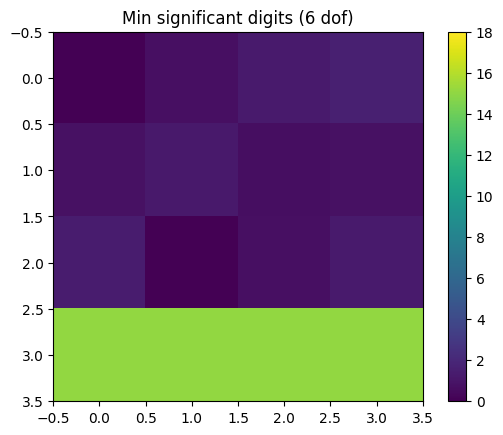

In [4]:
from matplotlib import pyplot as plt

plt.imshow(minsigbits6, vmin=0, vmax=18)
plt.title('Min significant digits (6 dof)')
plt.colorbar()

# plt.colorbar()
plt.show()


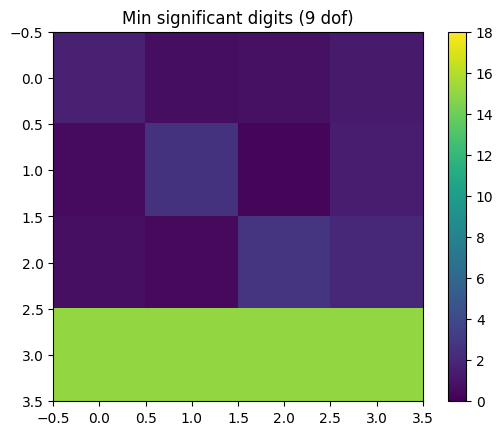

In [5]:
from matplotlib import pyplot as plt

plt.imshow(minsigbits9, vmin=0, vmax=18)
plt.title('Min significant digits (9 dof)')
plt.colorbar()

# plt.colorbar()
plt.show()

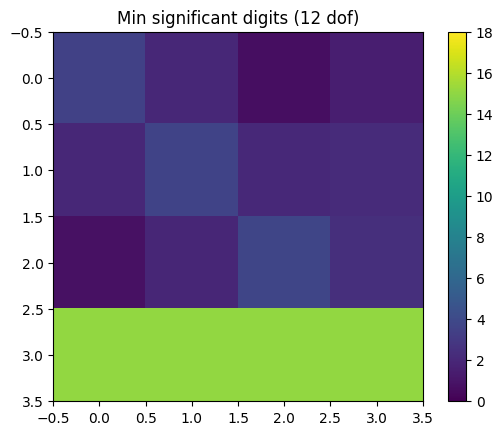

In [20]:
from matplotlib import pyplot as plt

plt.imshow(minsigbits12, vmin=0, vmax=18)
plt.title('Min significant digits (12 dof)')
plt.colorbar()

# plt.colorbar()
plt.show()

In [15]:
np.min(sigbits6), np.mean(sigbits6), np.max(sigbits6)

(-0.10121967954194871, 7.501156546275446, 15.078968115206713)

In [13]:
np.min(sigbits9), np.mean(sigbits9), np.max(sigbits9)

(0.3293520568343668, 7.26195462063424, 15.078968115206713)

In [21]:
np.min(sigbits12), np.mean(sigbits12), np.max(sigbits12)

(0.6798312168024838, 7.135855165431823, 15.078968115206713)

In [9]:
len(sigbits6)

33

In [10]:
len(sigbits9)

33